In [1]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
from IPython.display import HTML, SVG, display
from graphviz import Source

In [3]:
style = "<style>svg{width:100% !important;height:100% !important;}</style>"
HTML(style)

In [4]:
titanic_df = pd.read_csv("https://stepik.org/media/attachments/course/4852/titanic.csv")

In [5]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
# Проверим, есть ли не заполненные значения
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
X = titanic_df.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis=1)
y = titanic_df.Survived

In [8]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [9]:
# Преобразовываем данные для удобства работы с ними

# Параметр sex состоит из значений male и female, проеобразуем его в числовые значения,
# разбив на две колоки: sex_male, sex_semale. Аналогично для параметра Embarked
X = pd.get_dummies(X)

# Пропущенные значения для параметра Age заполним медиаными значениями
X = X.fillna({"Age": X.Age.median()})

# Убедимся, что не остплось не заполненных значений
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,False,True,False,False,True
887,1,19.0,0,0,30.0000,True,False,False,False,True
888,3,28.0,1,2,23.4500,True,False,False,False,True
889,1,26.0,0,0,30.0000,False,True,True,False,False


In [11]:
# Создадим и обучим дерево решений на полученных данных
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

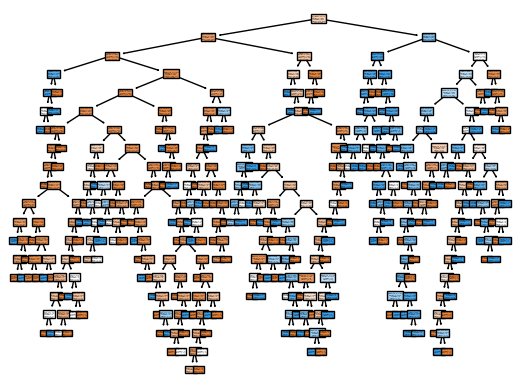

In [12]:
# Построим полученное дерево решений
tree.plot_tree(clf, feature_names=list(X), class_names=["Died", "Survived"], filled=True);

In [13]:
# Вывод
# По построенному дереву видно, что мы столкнулись с проблемой переобучения модели
# Получилось очень большое и сложное дерево, которое пытается идеально подстроиться под все данные
# При этом такая усложнённая можель может не подойти для аналогичной выборки с похожии данными
# Главная задача - обучить модель так, чтобы она нашла общие закономерности, имея ограниченный ресурс

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.33, random_state=45)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((294, 10), (597, 10), (294,), (597,))

In [16]:
# Проверим точность предсказаний модели для выборки до преобразований
clf.score(X, y)

0.9797979797979798

In [17]:
# Переобучим модель на обучающем множестве значений и проверим точность предсказаний модели для выборки после преобразований
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9863945578231292

In [18]:
# Проверим точность предсказаний модели для можества тестовых значений, которых класификатор не видел
clf.score(X_test, y_test)

0.7219430485762144

In [19]:
# Переобучим дерево, ограничив его ресурсы для обучения, задав максимальную глубину
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [20]:
# Проверим точность переообученной модели на обучающих данных
clf.score(X_train, y_train)

0.8299319727891157

In [21]:
# Проверим точность переообученной модели на тестовых данных
clf.score(X_test, y_test)

0.8190954773869347

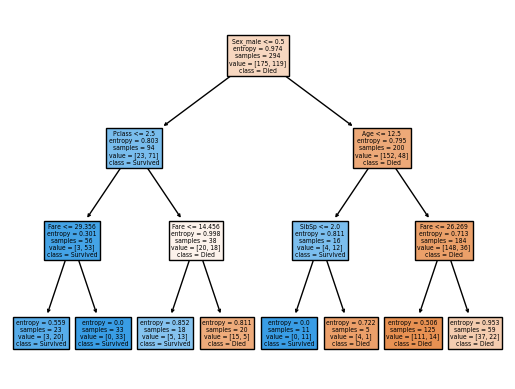

In [22]:
# Построим новое дерево решений для переобученной модели
tree.plot_tree(clf, feature_names=list(X), class_names=["Died", "Survived"], filled=True);

In [23]:
# Вывод
# Видим, что снизилась точность предсказания для обучающих данных, но при этом повысилась точность для тестовых данных
# При этом упростилось и само дерево решений при этом не сильно потеряв в точности